# Doğrusal Olmayan Regresyon Modelleri

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [269]:
from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


## Model & Tahmin

In [5]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [6]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [7]:
knn_model.n_neighbors

5

In [8]:
knn_model.metric

'minkowski'

In [9]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'p',
 'predict',
 'radius',
 'score',
 'set_params',
 'weights']

In [10]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [12]:
y_pred = knn_model.predict(X_test)

In [13]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

## Model Tuning

In [14]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [16]:
range(10)

range(0, 10)


In [19]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k=", k, "için RMSE değeri:", rmse)


k= 1 için RMSE değeri: 455.03925390751965
k= 2 için RMSE değeri: 415.99629571490965
k= 3 için RMSE değeri: 420.6765370082348
k= 4 için RMSE değeri: 428.8564674588792
k= 5 için RMSE değeri: 426.6570764525201
k= 6 için RMSE değeri: 423.5071669008732
k= 7 için RMSE değeri: 414.9361222421057
k= 8 için RMSE değeri: 413.7094731463598
k= 9 için RMSE değeri: 417.84419990871265
k= 10 için RMSE değeri: 421.6252180741266


In [ ]:
#GridSearchCV

In [20]:
knn_params = {"n_neighbors": np.arange(1,30,1)}

In [21]:
knn = KNeighborsRegressor()

In [23]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [24]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [25]:
#final model
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [26]:
y_pred = knn_tuned.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

413.7094731463598

# Destek Vektör Regresyonu (Support Vector Regression)

In [31]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model & Tahmin

In [44]:
svr_model = SVR("linear").fit(X_train, y_train)

In [45]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
svr_model.predict(X_train)[0:5]

array([219.32622169, 702.4303869 , 623.2055964 , 153.77538476,
       463.15190834])

In [47]:
svr_model.predict(X_test)[0:5]

array([679.14754685, 633.72883069, 925.68640849, 270.28463621,
       530.26659184])

In [48]:
svr_model.intercept_

array([-80.15196151])

In [49]:
svr_model.coef_

array([[ -1.21839037,   6.09602969,  -3.67574533,   0.14217075,
          0.51435919,   1.28388986,  12.55922537,  -0.08693755,
          0.46597184,   2.98259944,   0.52944523,  -0.79820799,
         -0.16015534,   0.30872794,   0.28842348,  -1.79560067,
          6.41868985, -10.74313783,   1.33374317]])

In [50]:
#test
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

370.04084185624924

## Model Tuning

In [84]:
svr_model = SVR("linear") 

In [85]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
svr_params = {"C": [0.1,0.5,1,3]}

In [87]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5).fit(X_train, y_train)

In [88]:
svr_cv_model.best_params_

{'C': 0.5}

In [90]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    6.1s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   28.6s finished


In [91]:
svr_cv_model.best_params_

{'C': 0.5}

In [92]:
svr_tuned = SVR("linear", C = 0.5).fit(X_train, y_train)

In [93]:
y_pred = svr_tuned.predict(X_test)

In [94]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.9874739022889

# Yapay Sinir Ağları

In [124]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model & Tahmin

In [190]:
scaler = StandardScaler()

In [191]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [192]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [193]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [194]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [195]:
mlp_model.predict(X_test_scaled)[0:5]

array([22.78862052, 41.17766769, 78.59464747, 10.98863072, 24.03048393])

In [196]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

656.4676085583709

## Model Tuning

In [199]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [198]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100)]}

In [206]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.3s finished


In [207]:
mlp_cv_model.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}

In [208]:
#final
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)

In [209]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [210]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.57251290657257

# CART (Classification and Regression Tree)

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

## Model & Tahmin

In [12]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [13]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=10, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

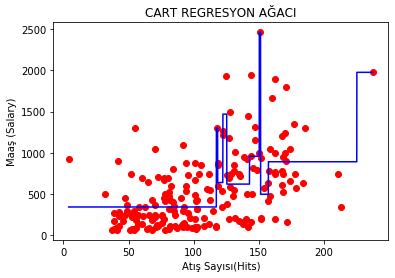

In [14]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
  
plt.scatter(X_train, y_train, color = 'red') 
  
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  

plt.title('CART REGRESYON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;

In [ ]:
#tek degiskenli tahmin

In [15]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [16]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

In [ ]:
#tum degiskenler

In [17]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [18]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [19]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

456.03799420552673

## Model Tuning

In [20]:
cart_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [61]:
cart_model = DecisionTreeRegressor(max_depth = 5).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

435.5080020622849

In [62]:
?cart_model

Type:        DecisionTreeRegressor
String form:
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_ <...> eight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="mse")
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal node.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.


In [63]:
cart_params = {"max_depth": [2,3,4,5,10,20],
              "min_samples_split": [2,10,5,30,50,10]}

In [64]:
cart_model = DecisionTreeRegressor()

In [65]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [66]:
cart_cv_model.best_params_

{'max_depth': 10, 'min_samples_split': 50}

In [ ]:
#final model

In [68]:
cart_tuned = DecisionTreeRegressor(max_depth = 10, min_samples_split = 50).fit(X_train, y_train)

In [69]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434

# Random Forests

In [70]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## Model & Tahmin

In [73]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [74]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [75]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

373.04044281427

## Model Tuning

In [77]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [80]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200, 500, 1000, 2000],
            "min_samples_split": [2,10,80,100]}

In [81]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.4min finished


In [82]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [84]:
rf_model = RandomForestRegressor(random_state = 42, 
                                 max_depth = 8,
                                max_features = 2,
                                min_samples_split = 2,
                                 n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)

In [85]:
rf_tuned

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [86]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

348.2372919119422

## Değişken Önem Düzeyi

In [87]:
rf_tuned.feature_importances_*100

array([5.83939544, 6.29671412, 3.5548773 , 4.16102585, 4.66774588,
       4.98722442, 7.39418621, 9.74125251, 8.68525461, 7.86496982,
       8.76583148, 8.2943961 , 9.70887995, 4.70922791, 2.05255543,
       1.85359068, 0.3831876 , 0.56203099, 0.47765369])

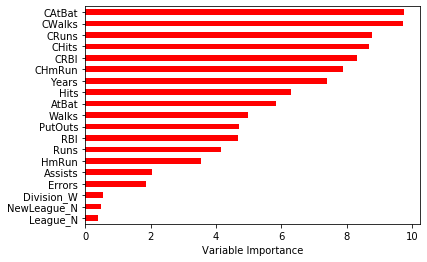

In [88]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Gradient Boosting Machines

In [89]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## Model & Tahmin

In [90]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [91]:
gbm_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:
y_pred = gbm_model.predict(X_test)

In [93]:
np.sqrt(mean_squared_error(y_test, y_pred))

353.7423771972263

## Model Tuning

In [95]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [96]:
?gbm_model

Type:        GradientBoostingRegressor
String form:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
           <...> =1.0, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)
Length:      100
File:        ~/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py
Docstring:  
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
    loss function to be optimized. 'ls' refers to least squares
    regression. 'lad' (least absolute deviation) is a highly robust
    loss function solely based on order information of the input
    variables. 'huber' is a combination of the

In [97]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
             "subsample": [1,0.5,0.8],
             "loss": ["ls","lad","quantile"]}

In [98]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [99]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  3.4min finished


In [100]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 1}

In [101]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                     loss = "lad",
                                     max_depth = 3,
                                     n_estimators = 200,
                                     subsample = 1).fit(X_train, y_train)

In [102]:
y_pred = gbm_tuned.predict(X_test)

In [103]:
np.sqrt(mean_squared_error(y_test, y_pred))

345.3350976402029

In [ ]:
#degisken onem duzeyleri

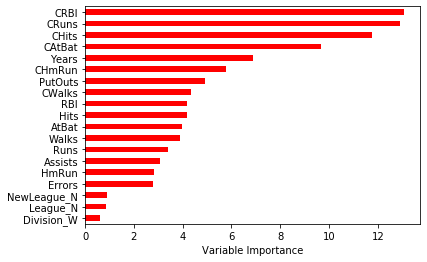

In [104]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# XGBoost

In [128]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## Model & Tahmin

In [118]:
!pip install xgboost

  Using cached https://files.pythonhosted.org/packages/96/84/4e2cae6247f397f83d8adc5c2a2a0c5d7d790a14a4c7400ff6574586f589/xgboost-0.90.tar.gz
  Stored in directory: /Users/mvahit/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


In [129]:
import xgboost

In [130]:
from xgboost import XGBRegressor

In [131]:
xgb = XGBRegressor().fit(X_train, y_train)

[10:48:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [132]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [133]:
y_pred = xgb.predict(X_test)

In [134]:
np.sqrt(mean_squared_error(y_test, y_pred))

359.91750599447033

## Model Tuning

In [135]:
xgb = XGBRegressor()
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [136]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,1]}

In [137]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:   32.2s


[11:01:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   43.1s finished


In [138]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.5,
 'max_depth': 2,
 'n_estimators': 100}

In [139]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.7, 
                         learning_rate = 0.5, 
                         max_depth = 2, 
                         n_estimators = 100).fit(X_train, y_train)


[11:09:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [140]:
y_pred = xgb_tuned.predict(X_test)

In [141]:
np.sqrt(mean_squared_error(y_test, y_pred))

360.59070607134015

# LightGBM

In [149]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [145]:
!pip install lightgbm

In [146]:
conda install -c conda-forge lightgbm

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda==2019.07=py37_0
  - defaults/osx-64::numba==0.44.1=py37h6440ff4_0
done

## Package Plan ##

  environment location: /Users/mvahit/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2019.03  |           py37_0           6 KB
    anaconda-custom            |           py37_1           3 KB
    ca-certificates-2019.9.11  |       hecc5488_0         143 KB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    lightgbm-2.2.3             |   py37h0a44026_0         660 KB
    openssl-1.1.1c             |       h01d97ff_0         1.9 

In [150]:
from lightgbm import LGBMRegressor

## Model & Tahmin

In [153]:
lgb_model = LGBMRegressor().fit(X_train, y_train)

In [154]:
lgb_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [155]:
y_pred = lgb_model.predict(X_test)

In [156]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [157]:
lgb_model = LGBMRegressor()
lgb_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [158]:
lgbm_params = {"learning_rate": [0.01, 0.1, 0.5, 1],
              "n_estimators": [20,40,100,200,500,1000],
              "max_depth": [1,2,3,4,5,6,7,8,9,10]}

In [159]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 471 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1411 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   24.4s finished


In [160]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [163]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                          max_depth = 6, 
                          n_estimators = 20).fit(X_train, y_train)

In [164]:
y_pred = lgbm_tuned.predict(X_test)

In [165]:
np.sqrt(mean_squared_error(y_test, y_pred))

371.5044868943621

# CatBoost

In [171]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [167]:
!pip install catboost

     |████████████████████████████████| 9.8MB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 7.2MB 2.6MB/s eta 0:00:01


## Model & Tahmin

In [172]:
from catboost import CatBoostRegressor

In [173]:
catb_model = CatBoostRegressor().fit(X_train, y_train)

0:	learn: 438.0966735	total: 54.5ms	remaining: 54.4s
1:	learn: 431.5853264	total: 57.6ms	remaining: 28.8s
2:	learn: 425.7558130	total: 60.4ms	remaining: 20.1s
3:	learn: 419.1494283	total: 63.4ms	remaining: 15.8s
4:	learn: 413.2198205	total: 66ms	remaining: 13.1s
5:	learn: 407.7285866	total: 68.8ms	remaining: 11.4s
6:	learn: 402.6999214	total: 71.3ms	remaining: 10.1s
7:	learn: 397.4711554	total: 74ms	remaining: 9.17s
8:	learn: 392.5019077	total: 76.4ms	remaining: 8.41s
9:	learn: 386.9350322	total: 79.1ms	remaining: 7.83s
10:	learn: 381.6044691	total: 81.7ms	remaining: 7.34s
11:	learn: 376.3829594	total: 85.1ms	remaining: 7.01s
12:	learn: 371.5857221	total: 88.7ms	remaining: 6.73s
13:	learn: 367.3826656	total: 90.7ms	remaining: 6.39s
14:	learn: 362.7543396	total: 93.6ms	remaining: 6.15s
15:	learn: 358.3970231	total: 96.7ms	remaining: 5.95s
16:	learn: 353.7775269	total: 100ms	remaining: 5.79s
17:	learn: 349.3496767	total: 102ms	remaining: 5.58s
18:	learn: 345.2665713	total: 105ms	remainin

In [290]:
dir(catb_model)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__neq__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base_calc_leaf_indexes',
 '_base_drop_unused_features',
 '_base_eval_metrics',
 '_base_predict',
 '_base_shrink',
 '_calc_fstr',
 '_calc_leaf_indexes',
 '_calc_ostr',
 '_check_is_regressor_loss',
 '_convert_to_asymmetric_representation',
 '_deserialize_model',
 '_estimator_type',
 '_eval_metrics',
 '_fit',
 '_get_borders',
 '_get_cat_feature_indices',
 '_get_float_feature_indices',
 '_get_params',
 '_get_tree_leaf_values',
 '_get_tree_splits',
 '_init_params',
 '_is_classification_objective',
 '_is_comparable_to',
 '_is_regression_objective',
 '

In [174]:
y_pred = catb_model.predict(X_test)

In [176]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.6108804474126

## Model Tuning

In [177]:
catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}

In [178]:
catb_model = CatBoostRegressor()

In [180]:
catb_cv_model = GridSearchCV(catb_model, 
                           catb_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   39.0s finished


0:	learn: 425.1513907	total: 1.05ms	remaining: 522ms
1:	learn: 402.8241549	total: 2.73ms	remaining: 681ms
2:	learn: 384.9516687	total: 3.92ms	remaining: 650ms
3:	learn: 370.2047924	total: 5ms	remaining: 620ms
4:	learn: 354.3912010	total: 6.11ms	remaining: 605ms
5:	learn: 341.2436603	total: 7.16ms	remaining: 589ms
6:	learn: 329.7531166	total: 8.41ms	remaining: 592ms
7:	learn: 321.4528232	total: 9.6ms	remaining: 591ms
8:	learn: 312.6602387	total: 10.7ms	remaining: 583ms
9:	learn: 303.5114728	total: 11.8ms	remaining: 580ms
10:	learn: 294.8248838	total: 13.1ms	remaining: 580ms
11:	learn: 287.9705821	total: 14.2ms	remaining: 577ms
12:	learn: 282.6327679	total: 15.2ms	remaining: 571ms
13:	learn: 276.7182887	total: 16.3ms	remaining: 564ms
14:	learn: 271.4490864	total: 17.3ms	remaining: 560ms
15:	learn: 266.8471238	total: 18.8ms	remaining: 568ms
16:	learn: 263.7752341	total: 19.8ms	remaining: 563ms
17:	learn: 257.5253460	total: 20.9ms	remaining: 558ms
18:	learn: 252.7637825	total: 21.9ms	remai

In [181]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.1}

In [182]:
catb_tuned = CatBoostRegressor(depth = 3, iterations = 500, learning_rate = 0.1).fit(X_train, y_train)

0:	learn: 425.1513907	total: 2.22ms	remaining: 1.11s
1:	learn: 402.8241549	total: 8.24ms	remaining: 2.05s
2:	learn: 384.9516687	total: 10.7ms	remaining: 1.77s
3:	learn: 370.2047924	total: 13.2ms	remaining: 1.64s
4:	learn: 354.3912010	total: 15.7ms	remaining: 1.55s
5:	learn: 341.2436603	total: 18.2ms	remaining: 1.5s
6:	learn: 329.7531166	total: 20.2ms	remaining: 1.42s
7:	learn: 321.4528232	total: 23.3ms	remaining: 1.43s
8:	learn: 312.6602387	total: 26.7ms	remaining: 1.46s
9:	learn: 303.5114728	total: 29.4ms	remaining: 1.44s
10:	learn: 294.8248838	total: 31.5ms	remaining: 1.4s
11:	learn: 287.9705821	total: 33.3ms	remaining: 1.35s
12:	learn: 282.6327679	total: 35.6ms	remaining: 1.33s
13:	learn: 276.7182887	total: 37ms	remaining: 1.28s
14:	learn: 271.4490864	total: 38.9ms	remaining: 1.26s
15:	learn: 266.8471238	total: 41ms	remaining: 1.24s
16:	learn: 263.7752341	total: 42.8ms	remaining: 1.22s
17:	learn: 257.5253460	total: 44.5ms	remaining: 1.19s
18:	learn: 252.7637825	total: 46.7ms	remaini

In [183]:
y_pred = catb_tuned.predict(X_test)

In [184]:
np.sqrt(mean_squared_error(y_test, y_pred))

342.8574937833235

# MAKINE OGRENMESI GOREVLERININ OTOMATIKLESTIRILMESI

In [228]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [317]:
def compML(df, y, alg):
    #train-test ayrimi
    y = df[y]
    X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
    X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_ismi = alg.__name__
    print(model_ismi, "Modeli Test Hatası:",RMSE)

In [318]:
compML(df, "Salary", SVR)

SVR Modeli Test Hatası: 473.4445984431814


In [283]:
models = [LGBMRegressor, 
          XGBRegressor, 
          GradientBoostingRegressor, 
          RandomForestRegressor, 
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor, 
          SVR]

In [320]:
for i in models:
    compML(df, "Salary", i)

LGBMRegressor Modeli Test Hatası: 363.8712087611089
[13:53:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor Modeli Test Hatası: 359.91750599447033
GradientBoostingRegressor Modeli Test Hatası: 349.7674420565306
RandomForestRegressor Modeli Test Hatası: 351.39463394426684
DecisionTreeRegressor Modeli Test Hatası: 519.1159209070132
MLPRegressor Modeli Test Hatası: 465.65322522489663
KNeighborsRegressor Modeli Test Hatası: 426.6570764525201
SVR Modeli Test Hatası: 473.4445984431814
